# Injecting custom-implemented LearnablePrompt in Instruct-Pix2Pix and comparing with the default model.

In [1]:
from diffusers import StableDiffusionInstructPix2PixPipeline
from learnable_prompt import LearnablePrompt
from prompt_tuning_attack.src.utils import open_image, display_image

import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    safety_checker=None,
).to("cuda" if torch.cuda.is_available() else "cpu")

clip_model= clip.load("ViT-L/14", device=device)[0]

/users/eleves-b/2024/alessandro.pranzo/.pyenv/versions/3.10.15/envs/gen_ai_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.67it/s]


In [2]:
image = open_image("zebra.jpg")
output = model(
    "make the zebra red",
    image=  image,
    num_inference_steps=50,
    guidance_scale=7.5,
    negative_prompt="bad quality, blurry, low resolution"
)

100%|██████████| 50/50 [00:08<00:00,  5.67it/s]


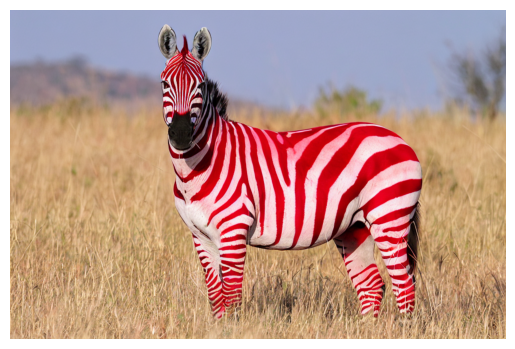

In [3]:
display_image(output.images[0])

In [5]:
trial_prompt = LearnablePrompt(
    device=device, 
    template="Change the color of the zebra to: red", 
    ctx_len=10, 
    clip_model = clip_model
)

trial_negative_prompt = LearnablePrompt(
    device=device, 
    template="bad quality, blurry, low resolution", 
    ctx_len=0, 
    clip_model = clip_model
)

In [6]:
output2 = model(
    prompt_embeds = trial_prompt(),
    image=  image,
    num_inference_steps=50,
    guidance_scale=7.5,
    negative_embeds = trial_negative_prompt(),
)

100%|██████████| 50/50 [00:08<00:00,  5.64it/s]


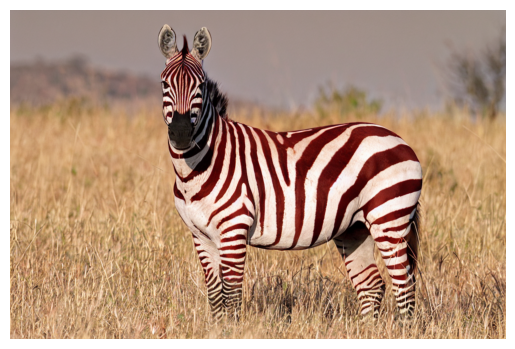

In [7]:
display_image(output2.images[0])